In [1]:
###############################################################################
# RFA - TRABAJO ACADEMICO 1                                                   #
# Aitana Menarguez Box                                                        #
#                                                                             #
# Comparativa de componentes de SVD para MNIST                                #
# y los modelos de clasificacion:                                             #
# - Regresion logistica                                                       #
# - Perceptron                                                                #
###############################################################################

# Importacion de LIBRERIAS
from numpy import mean
from numpy import std
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt

In [2]:
# FUNCIONES auxiliares
def getData(): # Descarga de datos
    X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
    return X, y

def getLR(): # Modelos de LR a evaluar
    models = dict()
    for i in range(3,40):
        steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression(C=0.1, max_iter=100))]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
def evaluateModel(model, X, y): # Evaluacion de modelos (cross-validation)
    cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cross_val, n_jobs=-1, error_score='raise')
    return scores

# ALGORITMO de entrenamiento y evaluacion
# Obtener datos
print('Obteniendo datos...')
X, y = getData()
# REGRESION LOGISTICA
print('Evaluando modelos de regresión logística...')
# Obtener modelos
modelsLR = getLR()
# Evaluar modelos y obtener resultados
resultsLR, namesLR = list(), list()
with open('MNIST_lr_res.txt', 'w') as f:
    for name, model in modelsLR.items():
        print('Evaluando modelo %s...' % name)
        scores = evaluateModel(model, X, y)
        resultsLR.append(scores)
        namesLR.append(name)
        # Volcar resultados en fichero
        res = '>%s %.3f (%.3f)\n' % (name, mean(scores), std(scores))
        f.write(res)

Obteniendo datos...
Evaluando modelos de regresión logística...
Evaluando modelo 3...
Evaluando modelo 4...
Evaluando modelo 5...
Evaluando modelo 6...
Evaluando modelo 7...
Evaluando modelo 8...
Evaluando modelo 9...
Evaluando modelo 10...
Evaluando modelo 11...
Evaluando modelo 12...
Evaluando modelo 13...
Evaluando modelo 14...
Evaluando modelo 15...
Evaluando modelo 16...
Evaluando modelo 17...
Evaluando modelo 18...
Evaluando modelo 19...
Evaluando modelo 20...
Evaluando modelo 21...
Evaluando modelo 22...
Evaluando modelo 23...
Evaluando modelo 24...
Evaluando modelo 25...
Evaluando modelo 26...
Evaluando modelo 27...
Evaluando modelo 28...
Evaluando modelo 29...
Evaluando modelo 30...
Evaluando modelo 31...
Evaluando modelo 32...
Evaluando modelo 33...
Evaluando modelo 34...
Evaluando modelo 35...
Evaluando modelo 36...
Evaluando modelo 37...
Evaluando modelo 38...
Evaluando modelo 39...


In [3]:
# FUNCIONES auxiliares
def getData(): # Descarga de datos
    X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
    return X, y

def getP(): # Modelos de perceptron a evaluar
    models = dict()
    for i in range(3,40):
        steps = [('svd', TruncatedSVD(n_components=i)), ('m', Perceptron(alpha=0.0001, max_iter=100))]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
def evaluateModel(model, X, y): # Evaluacion de modelos (cross-validation)
    cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cross_val, n_jobs=-1, error_score='raise')
    return scores

# ALGORITMO de entrenamiento y evaluacion
# Obtener datos
print('Obteniendo datos...')
X, y = getData()
# NAIVE BAYES
print('Evaluando modelos de Perceptron...')
# Obtener modelos
modelsP = getP()
# Evaluar modelos y obtener resultados
resultsP, namesP = list(), list()
with open('MNIST_p_res.txt', 'w') as f:
    for name, model in modelsP.items():
        print('Evaluando modelo %s...' % name)
        scores = evaluateModel(model, X, y)
        resultsP.append(scores)
        namesP.append(name)
        # Volcar resultados en fichero
        res = '>%s %.3f (%.3f)\n' % (name, mean(scores), std(scores))
        f.write(res)

Obteniendo datos...
Evaluando modelos de Perceptron...
Evaluando modelo 3...
Evaluando modelo 4...
Evaluando modelo 5...
Evaluando modelo 6...
Evaluando modelo 7...
Evaluando modelo 8...
Evaluando modelo 9...
Evaluando modelo 10...
Evaluando modelo 11...
Evaluando modelo 12...
Evaluando modelo 13...
Evaluando modelo 14...
Evaluando modelo 15...
Evaluando modelo 16...
Evaluando modelo 17...
Evaluando modelo 18...
Evaluando modelo 19...
Evaluando modelo 20...
Evaluando modelo 21...
Evaluando modelo 22...
Evaluando modelo 23...
Evaluando modelo 24...
Evaluando modelo 25...
Evaluando modelo 26...
Evaluando modelo 27...
Evaluando modelo 28...
Evaluando modelo 29...
Evaluando modelo 30...
Evaluando modelo 31...
Evaluando modelo 32...
Evaluando modelo 33...
Evaluando modelo 34...
Evaluando modelo 35...
Evaluando modelo 36...
Evaluando modelo 37...
Evaluando modelo 38...
Evaluando modelo 39...


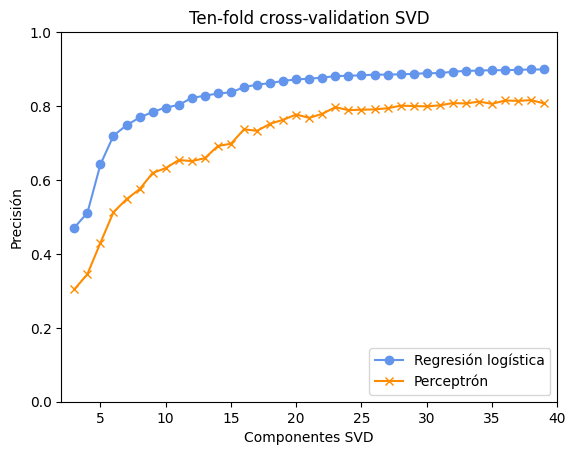

In [4]:
# Mostrar RESULTADOS
xLR = [i for i in range(3,40)]
yLR = []
with open ('MNIST_lr_res.txt', 'r') as f:
    for line in f:
        n = line.split()[0][1:]
        a = line.split()[1]
        if a != "":
            yLR.append(float(a))
            # xLR.append(n)

xP = [i for i in range(3,40)]
yP = []
with open ('MNIST_p_res.txt', 'r') as f:
    for line in f:
        n = line.split()[0][1:]
        a = line.split()[1]
        if a != "":
            yP.append(float(a))
            # xP.append(n)


plt.ylabel('Precisión')
plt.xlabel('Componentes SVD')
plt.title('Ten-fold cross-validation SVD')
plt.axis([2, 40, 0, 1])

plt.plot(xLR,yLR,marker='o', color='cornflowerblue', label = 'Regresión logística')
plt.plot(xP,yP,marker='x', color='darkorange', label = 'Perceptrón')
plt.legend(loc='lower right')
plt.savefig('MNIST_results.pdf')
plt.show()